## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for Missing values

In [12]:
# how many rows have missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Drop ID Feature

In [13]:
# Drop ID Feature for Dataset  as it has no use for analysis

df.drop(['customerID'],axis=1,inplace=True)

### # Label the Churn Feature to either 1 or 0

In [18]:
# Label the Churn Feature to either 1 or 0 based on Yes and No

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
df['target']=np.where(df['Churn']=="Yes",1,0)

In [23]:
df['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

### Dropping the churn feature to retain only Target

In [24]:
# Dropping the churn feature to retain only Target

df.drop(['Churn'],axis=1,inplace=True)

## Defining Target and Independent Variables

In [25]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

In [31]:
#getting the churn rate i.e. event rate

Y.mean()

target    0.26537
dtype: float64

## Split Independent Features into Numerical and Categorical 

In [32]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [35]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [36]:
#check whether senior citizen is an indicator feature or not

num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [37]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


### Dropping indicator feature from num to form a separate DF

In [38]:
# for better data processing we're seperating the the indicator feature in a separate dataframe

ind=num[['SeniorCitizen']]
num.drop(['SeniorCitizen'],axis=1,inplace=True)

## Outlier analysis of numerical features

In [40]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

# here we can see that difference between 99% and max is quite considerable,hence we will cap in
# there is also some difference though not huge between min and 1%, we'll cap that as well, however we may choose not to

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


## Capping and  Flooring outliers

In [44]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [45]:
num=num.apply(lambda x:outlier_cap(x))

In [46]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])
# now we see that there is no difference between 1% and minimum and 99% and max as we have capped the outliers

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243530
std,24.557454,30.062810,2260.002195
min,1.000000,19.200000,19.883180
1%,1.000000,19.200000,19.890244
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


### Missing value analysis

In [52]:
num.isnull().sum()

# since there is no missing value, hence imputation is not needed

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

## Feature Selection- Numerical Features

### Part 1: Remove features with zero variance

In [54]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num)

#get columns to create a new df from only those columns
cols=varselector.get_support(indices=True)
num1=num.iloc[:,cols]

In [55]:
num1.iloc[0]
#none of the colums got dropped as none of them have zero variance

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

### Part 2: Bivariate Analysis (Feature Discretization)

In [58]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index,columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


#### Understanding the predictive power of Numberical features

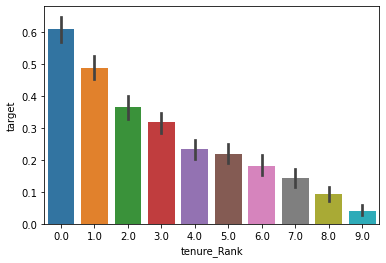

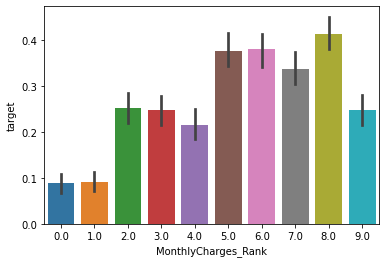

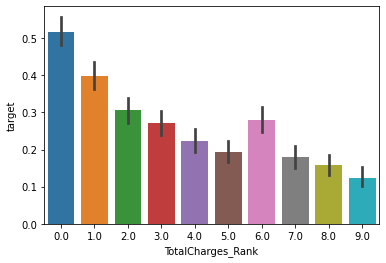

In [61]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean

for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col,y='target',data=X_bin_combined,estimator=mean)

In [62]:
# All features from num1 will be selected as they have a good discrimination power
# hence we will keep all of them and not use select k best 

select_features_df_num=num1

In [63]:
select_features_df_num.shape

(7043, 3)

## Feature Selection - Categorical Features

### Part 1: Bivariate Analysism: Understanding the predictive power of Numberical features

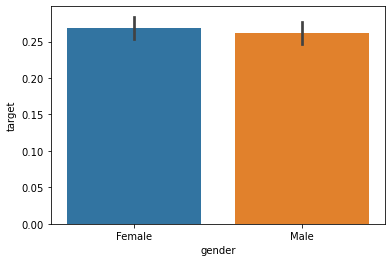

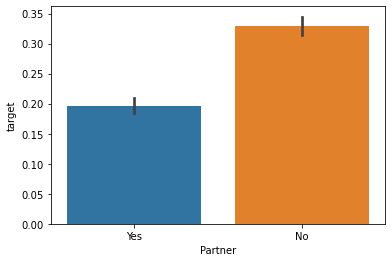

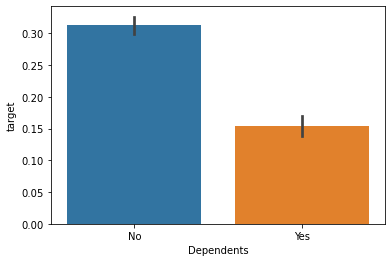

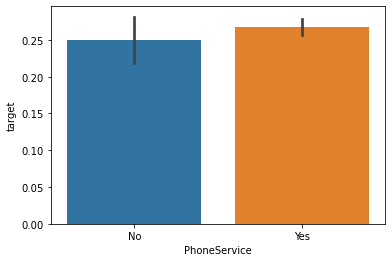

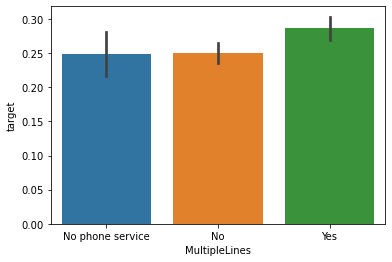

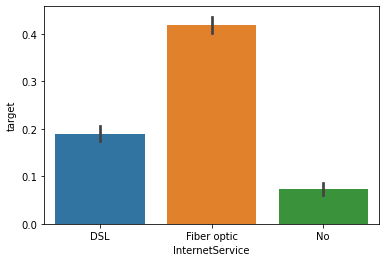

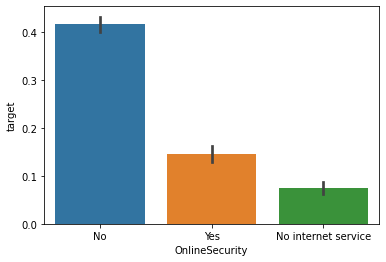

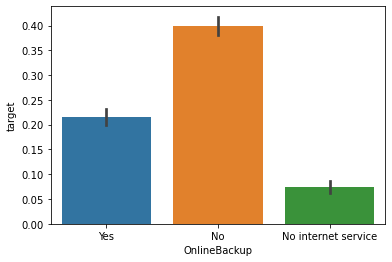

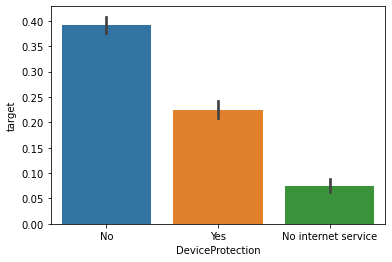

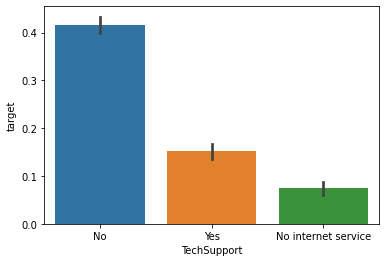

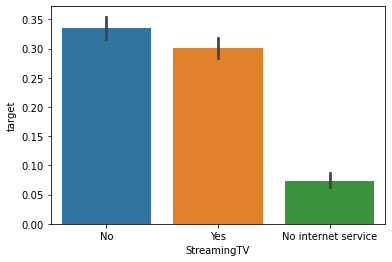

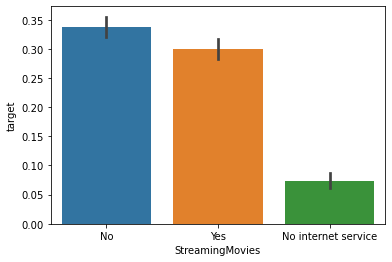

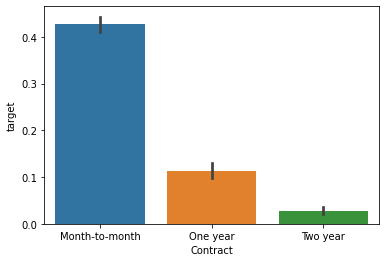

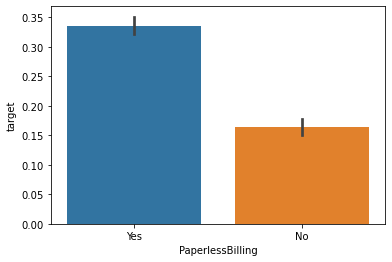

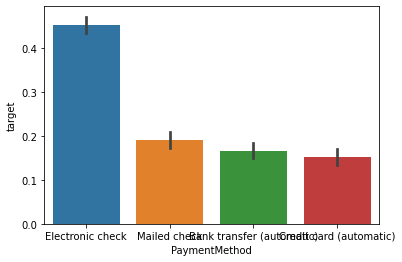

In [65]:
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean

for col in char.columns:
    plt.figure()
    sns.barplot(x=col,y='target',data=X_char_merged,estimator=mean)
    



In [66]:
# dropping features that have low predictive power by using the above bar plot
char.drop(['gender','PhoneService','MultipleLines'],axis=1,inplace=True)

In [67]:
# create dummy features with n-1 level
X_char_dum=pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(7043, 22)

### Part 2: Select K Best features
further reducing number of features

In [71]:
# select k best for categorical features

from sklearn.feature_selection import SelectKBest,chi2

selector=SelectKBest(chi2,k=20)
selector.fit_transform(X_char_dum,Y)

#get columns to create a new dataframe with the selected columns
cols=selector.get_support(indices=True)
select_features_df_char=X_char_dum.iloc[:,cols]

In [73]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

## Feature Selection: Numerical Indicator Feature

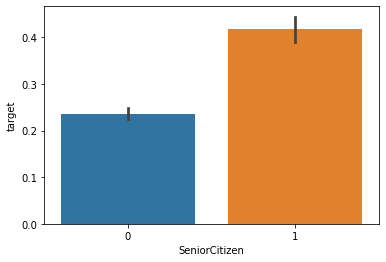

In [74]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')

for col in ind.columns:
    plt.figure()
    sns.barplot(x=col,y='target',data=X_ind_merged,estimator=mean)

In [75]:
select_features_df_ind=ind

## Creating a  Master Feature Set for Model Development

In [77]:
X_all=pd.concat([select_features_df_num, select_features_df_char,select_features_df_ind],axis=1,join='inner')


In [89]:
#min max and mean of X before splitting
X_all.describe()

,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243530,0.483033,0.299588,0.439585,0.216669,0.216669,0.286668,0.216669,...,0.290217,0.216669,0.216669,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.162147
std,24.557454,30.062810,2260.002195,0.499748,0.458110,0.496372,0.412004,0.412004,0.452237,0.412004,...,0.453895,0.412004,0.412004,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.368612
min,1.000000,19.200000,19.883180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,72.000000,114.729000,8039.256000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
# event rate before splitting
Y['target'].mean()

0.2653698707936959

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.3,random_state=10)

#### Verifying the Split data is properly seperated

In [88]:
### Event rate after splitting

print(y_train.mean())

print(y_test.mean())

target    0.266126
dtype: float64
target    0.263606
dtype: float64


In [90]:
X_train.describe()

,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
count,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,...,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000,4930.000000
mean,32.450507,64.918146,2285.482546,0.485396,0.304462,0.441379,0.213185,0.213185,0.286004,0.213185,...,0.291886,0.213185,0.213185,0.207911,0.242394,0.591075,0.223124,0.335700,0.221095,0.162475
std,24.591986,29.979163,2261.410852,0.499837,0.460226,0.496602,0.409599,0.409599,0.451937,0.409599,...,0.454676,0.409599,0.409599,0.405854,0.428575,0.491685,0.416383,0.472282,0.415027,0.368923
min,1.000000,19.200000,19.883180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,36.175000,396.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.400000,1394.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,89.850000,3778.687500,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,72.000000,114.729000,8039.256000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
X_test.describe()

,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,32.191197,64.356650,2258.020458,0.477520,0.288216,0.435400,0.224799,0.224799,0.288216,0.224799,...,0.286323,0.224799,0.224799,0.212021,0.236630,0.594889,0.199716,0.336015,0.247042,0.161382
std,24.481544,30.260549,2257.130001,0.499613,0.453039,0.495927,0.417549,0.417549,0.453039,0.417549,...,0.452149,0.417549,0.417549,0.408836,0.425114,0.491030,0.399882,0.472456,0.431394,0.367970
min,1.000000,19.200000,19.883180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,33.450000,401.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,70.300000,1396.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3801.300000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,72.000000,114.729000,8039.256000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# from above X splits, we can see that the X is properly splitted wiht min max and mean similar to X_all

### Logistic Regression
starting with statistical algorithm

In [92]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',random_state=0)b

#### Hyper Parameter Tuning

In [95]:
#gridsearch cv
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist={'max_depth':[3,5,6,7],'min_samples_split':[50,100,150,200,250]}
tree_grid=GridSearchCV(dtree,cv=10,param_grid=param_dist,n_jobs=3)
tree_grid.fit(X_train,y_train)
print('Best Parameters using Grid Search: \n',tree_grid.best_params_)

Best Parameters using Grid Search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [96]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

#### Feature importance

In [100]:

feature_importances=pd.DataFrame(rf.feature_importances_, 
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
tenure,0.188384
TotalCharges,0.121662
PaymentMethod_Electronic check,0.120966
Contract_Two year,0.098088
InternetService_Fiber optic,0.086792
MonthlyCharges,0.060647
Contract_One year,0.040105
OnlineSecurity_Yes,0.039029
TechSupport_Yes,0.035054
OnlineSecurity_No internet service,0.028540


### Gradient Boosting 

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

#### Feature importance

In [102]:
feature_importances_gbm=pd.DataFrame(gbm.feature_importances_,
                                    index=X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbm

,importance
tenure,0.207184
TotalCharges,0.182088
MonthlyCharges,0.171018
PaymentMethod_Electronic check,0.137353
InternetService_Fiber optic,0.132630
Contract_Two year,0.035270
Contract_One year,0.033820
PaperlessBilling_Yes,0.019569
OnlineSecurity_Yes,0.016303
TechSupport_Yes,0.012952


#### Stacking Classifier

In [104]:
# combining the output of both strong algo random forest(bagging) and gbm(boosting)  
# with the aim to pass it through a Stacking Classifier using Logisitic regression to find if stacking results of both 
# gives better results or not



base_learners=[('rf',RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
               ('gbm',GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))]

In [106]:

from sklearn.ensemble import StackingClassifier

stack=StackingClassifier(estimators=base_learners,final_estimator=LogisticRegression())
stack.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

## Model Evaluation

In [107]:
y_pred_logreg=logreg.predict(X_test)
y_pred_dtree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stack=stack.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_logreg))
print("Accuracy: ",metrics.precision_score(y_test,y_pred_logreg))
print("Accuracy: ",metrics.recall_score(y_test,y_pred_logreg))
print("Accuracy: ",metrics.f1_score(y_test,y_pred_logreg))

Accuracy:  0.7974443918599148
Accuracy:  0.6381156316916489
Accuracy:  0.5350089766606823
Accuracy:  0.58203125


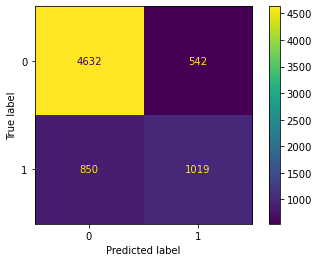

In [119]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

Accuracy:  0.7950780880265026
Precision:  0.6455399061032864
Recall:  0.49371633752244165
F1-Score:  0.5595116988809766


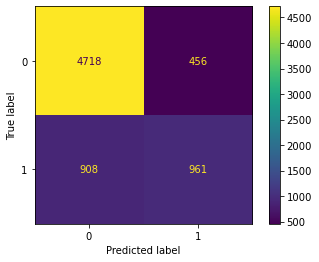

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_dtree))
print("Precision: ",metrics.precision_score(y_test,y_pred_dtree))
print("Recall: ",metrics.recall_score(y_test,y_pred_dtree))
print("F1-Score: ",metrics.f1_score(y_test,y_pred_dtree))

metrics.plot_confusion_matrix(dtree,X_all,Y)

Accuracy:  0.7969711310932324
Precision:  0.6666666666666666
Recall:  0.45960502692998206
F1-Score:  0.5441020191285867


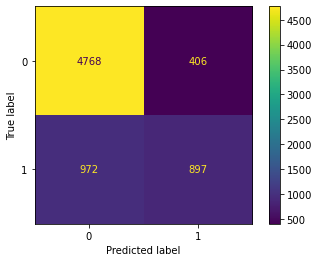

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_rf))
print("Precision: ",metrics.precision_score(y_test,y_pred_rf))
print("Recall: ",metrics.recall_score(y_test,y_pred_rf))
print("F1-Score: ",metrics.f1_score(y_test,y_pred_rf))

metrics.plot_confusion_matrix(rf,X_all,Y)

Accuracy:  0.7979176526265973
Precision:  0.6406926406926406
Recall:  0.5314183123877917
F1-Score:  0.5809617271835132


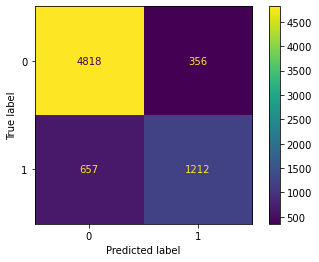

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_gbm))
print("Precision: ",metrics.precision_score(y_test,y_pred_gbm))
print("Recall: ",metrics.recall_score(y_test,y_pred_gbm))
print("F1-Score: ",metrics.f1_score(y_test,y_pred_gbm))

metrics.plot_confusion_matrix(gbm,X_all,Y)

Accuracy:  0.7988641741599621
Precision:  0.65
Recall:  0.5134649910233393
F1-Score:  0.5737211634904715


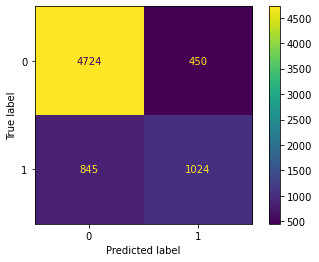

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_stack))
print("Precision: ",metrics.precision_score(y_test,y_pred_stack))
print("Recall: ",metrics.recall_score(y_test,y_pred_stack))
print("F1-Score: ",metrics.f1_score(y_test,y_pred_stack))

metrics.plot_confusion_matrix(stack,X_all,Y)

In [ ]:
# from the above model we can see that True Positives of gbm model is the best,false negatives are also comparatively low
# however there are still a lot of misclassification and a lot of false negatives. hence low recall score

# So from the above recall scores, we will know that it's around 50%, which means the actual churners are getting
# probability vlaues less that 50% hence they are getting characterised as 0, when they are actual 0s

# so in this case it is better to use a lower probability values as cut off to identify churners.
# hence we will be using lorenz curve with actual predicted probability instead of predicted values(0 or 1)

## Lorenz Curve

#### Logistic Regression Lorenz Curve

In [156]:
y_pred_prob=logreg.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_rank_logreg']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)


#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_rank_logreg')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_rank_logreg',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
# named after Kolmogorov–Smirnov test
# KS metrics tells us how similar(closer) or dissimilar(far apart) two distributions are
# for a good model the KS value will maximize between 2nd and 3rd decile because that is where majority of the polulation
# lies which basically means if you go through top 30% of your data, that should account for majority of the events

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number
sorted_reindexed

,P_rank_logreg,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.760284,0.736007,536.0,536.0,0.286784,0.286784,169.0,169.0,0.032663,0.032663,0.2541,0.100099,0.100099,1
1,9,704,0.572443,0.594917,403.0,939.0,0.215623,0.502408,301.0,470.0,0.058175,0.090839,0.4116,0.099957,0.200057,2
2,8,704,0.443182,0.460019,312.0,1251.0,0.166934,0.669342,392.0,862.0,0.075763,0.166602,0.5027,0.099957,0.300014,3
3,7,704,0.308239,0.328185,217.0,1468.0,0.116105,0.785447,487.0,1349.0,0.094124,0.260727,0.5247,0.099957,0.399972,4
4,6,704,0.225852,0.218394,159.0,1627.0,0.085072,0.870519,545.0,1894.0,0.105334,0.366061,0.5045,0.099957,0.499929,5
5,5,705,0.160284,0.145098,113.0,1740.0,0.060460,0.930979,592.0,2486.0,0.114418,0.480479,0.4505,0.100099,0.600028,6
6,4,704,0.090909,0.091236,64.0,1804.0,0.034243,0.965222,640.0,3126.0,0.123695,0.604175,0.3610,0.099957,0.699986,7
7,3,704,0.052557,0.051302,37.0,1841.0,0.019797,0.985019,667.0,3793.0,0.128914,0.733089,0.2519,0.099957,0.799943,8
8,2,704,0.024148,0.024060,17.0,1858.0,0.009096,0.994114,687.0,4480.0,0.132779,0.865868,0.1282,0.099957,0.899901,9
9,1,705,0.015603,0.007748,11.0,1869.0,0.005886,1.000000,694.0,5174.0,0.134132,1.000000,-0.0000,0.100099,1.000000,10


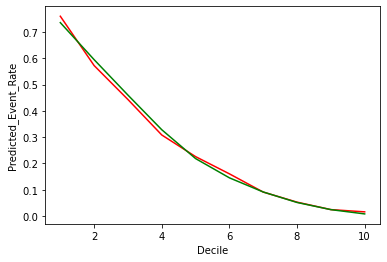

In [157]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

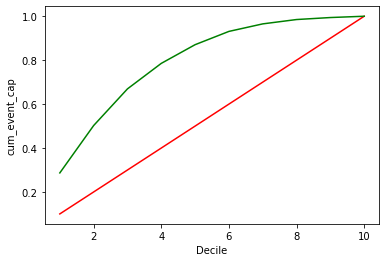

In [158]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')

#### Decision Tree Lorenz Curve

In [159]:
y_pred_prob=dtree.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_rank_dtree']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)


#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_rank_dtree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_rank_dtree')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_rank_dtree',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)


sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number
sorted_reindexed

,P_rank_dtree,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.757447,0.775697,534.0,534.0,0.285714,0.285714,171.0,171.0,0.033050,0.033050,0.2527,0.100099,0.100099,1
1,9,704,0.600852,0.612564,423.0,957.0,0.226324,0.512039,281.0,452.0,0.054310,0.087360,0.4247,0.099957,0.200057,2
2,8,704,0.420455,0.440659,296.0,1253.0,0.158373,0.670412,408.0,860.0,0.078856,0.166216,0.5042,0.099957,0.300014,3
3,7,704,0.329545,0.325437,232.0,1485.0,0.124131,0.794543,472.0,1332.0,0.091225,0.257441,0.5371,0.099957,0.399972,4
4,6,704,0.198864,0.198429,140.0,1625.0,0.074906,0.869449,564.0,1896.0,0.109007,0.366448,0.5030,0.099957,0.499929,5
5,5,705,0.156028,0.152310,110.0,1735.0,0.058855,0.928304,595.0,2491.0,0.114998,0.481446,0.4469,0.100099,0.600028,6
6,4,704,0.120739,0.101395,85.0,1820.0,0.045479,0.973783,619.0,3110.0,0.119637,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.039016,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,-0.0000,0.100099,1.000000,10


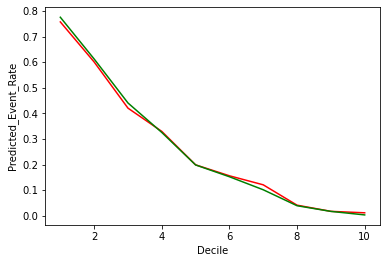

In [160]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

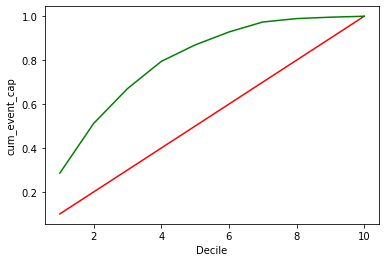

In [161]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')

#### Random Forest Lorenz Curve

In [162]:
y_pred_prob=rf.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_rank_rf']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)


#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_rank_rf')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_rank_rf',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)


sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number
sorted_reindexed

,P_rank_rf,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.763121,0.667740,538.0,538.0,0.287854,0.287854,167.0,167.0,0.032277,0.032277,0.2556,0.100099,0.100099,1
1,9,704,0.596591,0.533612,420.0,958.0,0.224719,0.512574,284.0,451.0,0.054890,0.087167,0.4254,0.099957,0.200057,2
2,8,704,0.457386,0.426432,322.0,1280.0,0.172285,0.684858,382.0,833.0,0.073831,0.160997,0.5239,0.099957,0.300014,3
3,7,704,0.311080,0.325696,219.0,1499.0,0.117175,0.802033,485.0,1318.0,0.093738,0.254735,0.5473,0.099957,0.399972,4
4,6,704,0.235795,0.253239,166.0,1665.0,0.088818,0.890851,538.0,1856.0,0.103981,0.358717,0.5321,0.099957,0.499929,5
5,5,705,0.130496,0.186314,92.0,1757.0,0.049224,0.940075,613.0,2469.0,0.118477,0.477194,0.4629,0.100099,0.600028,6
6,4,704,0.092330,0.128399,65.0,1822.0,0.034778,0.974853,639.0,3108.0,0.123502,0.600696,0.3742,0.099957,0.699986,7
7,3,704,0.048295,0.079613,34.0,1856.0,0.018192,0.993044,670.0,3778.0,0.129494,0.730189,0.2629,0.099957,0.799943,8
8,2,704,0.015625,0.037686,11.0,1867.0,0.005886,0.998930,693.0,4471.0,0.133939,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.017306,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


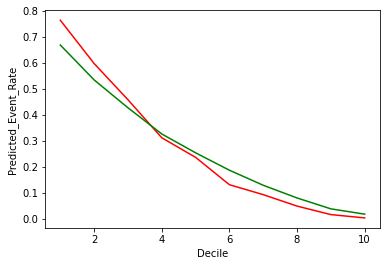

In [163]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

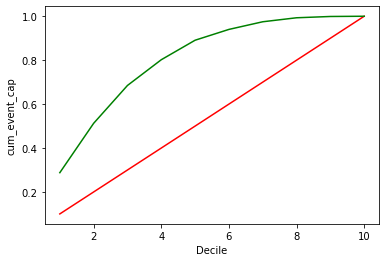

In [164]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')

#### GBM Lorenz Curve

In [165]:
y_pred_prob=gbm.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_rank_gbm']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)


#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_rank_gbm')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_rank_gbm')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_rank_gbm',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)


sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number
sorted_reindexed

,P_rank_gbm,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.914894,0.816501,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,0.100099,0.100099,1
1,9,704,0.667614,0.614637,470.0,1115.0,0.251471,0.596576,234.0,294.0,0.045226,0.056823,0.5398,0.099957,0.200057,2
2,8,704,0.494318,0.458804,348.0,1463.0,0.186196,0.782772,356.0,650.0,0.068806,0.125628,0.6571,0.099957,0.300014,3
3,7,704,0.267045,0.312966,188.0,1651.0,0.100589,0.883360,516.0,1166.0,0.099729,0.225358,0.6580,0.099957,0.399972,4
4,6,704,0.167614,0.193597,118.0,1769.0,0.063135,0.946495,586.0,1752.0,0.113259,0.338616,0.6079,0.099957,0.499929,5
5,5,705,0.069504,0.119308,49.0,1818.0,0.026217,0.972713,656.0,2408.0,0.126788,0.465404,0.5073,0.100099,0.600028,6
6,4,704,0.034091,0.071687,24.0,1842.0,0.012841,0.985554,680.0,3088.0,0.131426,0.596830,0.3887,0.099957,0.699986,7
7,3,704,0.026989,0.036621,19.0,1861.0,0.010166,0.995720,685.0,3773.0,0.132393,0.729223,0.2665,0.099957,0.799943,8
8,2,704,0.008523,0.017694,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.010378,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,-0.0000,0.100099,1.000000,10


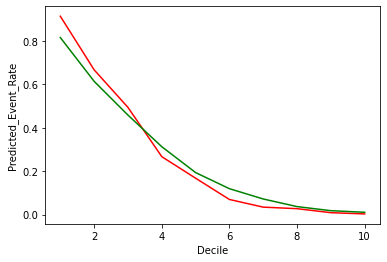

In [166]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

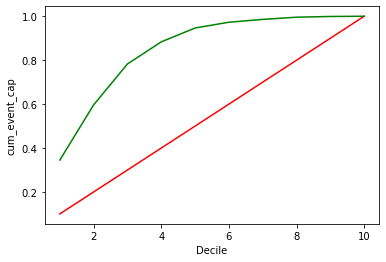

In [167]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')

#### Stacking Classifier Lorenz Curve

In [168]:
y_pred_prob=stack.predict_proba(X_all)[:,1]   #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_rank_stack']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)


#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_rank_stack')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_rank_stack')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_rank_stack',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)


sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)

sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number
sorted_reindexed

,P_rank_stack,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.802837,0.773193,566.0,566.0,0.302836,0.302836,139.0,139.0,0.026865,0.026865,0.2760,0.100099,0.100099,1
1,9,704,0.602273,0.595722,424.0,990.0,0.226859,0.529695,280.0,419.0,0.054117,0.080982,0.4487,0.099957,0.200057,2
2,8,704,0.454545,0.422179,320.0,1310.0,0.171215,0.700910,384.0,803.0,0.074217,0.155199,0.5457,0.099957,0.300014,3
3,7,704,0.325284,0.274594,229.0,1539.0,0.122525,0.823435,475.0,1278.0,0.091805,0.247004,0.5764,0.099957,0.399972,4
4,6,704,0.213068,0.188837,150.0,1689.0,0.080257,0.903692,554.0,1832.0,0.107074,0.354078,0.5496,0.099957,0.499929,5
5,5,705,0.130496,0.132047,92.0,1781.0,0.049224,0.952916,613.0,2445.0,0.118477,0.472555,0.4804,0.100099,0.600028,6
6,4,704,0.076705,0.095794,54.0,1835.0,0.028892,0.981808,650.0,3095.0,0.125628,0.598183,0.3836,0.099957,0.699986,7
7,3,704,0.034091,0.073122,24.0,1859.0,0.012841,0.994650,680.0,3775.0,0.131426,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.012784,0.057527,9.0,1868.0,0.004815,0.999465,695.0,4470.0,0.134325,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.051527,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


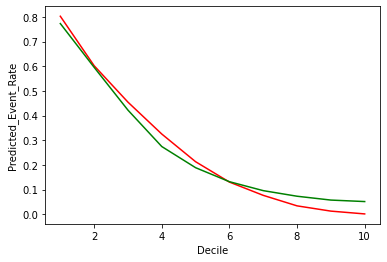

In [169]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

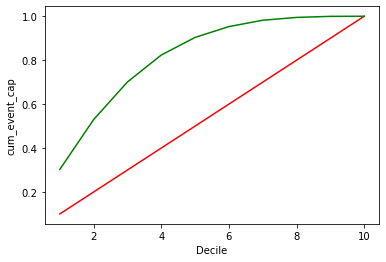

In [170]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')

In [ ]:
# The best model should have maximum cumulative event capture between 2-3 deciles.
# Based on the KS values and cumulative event capture rate we can conclude that GBM is the best model as it is
# accounting for 78% of data within the first 3 deciles i.e. top 30% data

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with Loan offers
# Since Monthly Income and Existing EMI are the most important features for the GBM model
# We will build a Business Value Metric based on Existing EMI/Monthly Income
# Low Values of this ratio will indicate valueable customers
# Within the High Value group, we can leverage the model to identify the best targets

## Creating Strategies 
by analysing the output of Machine Learning Model

In [173]:
# creating quartiles of the columns to identify in which decile the min max and mean is located. 
# So that we could actually use the customized ranges to classify(define low, high categories etc)  

df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [174]:
df['tenure'].mean()
#mean of the data lies in 5-6 deciles

32.37114865824223

In [176]:
# hence everyone <=6 will be low tensure else high
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [178]:
# similarly doing for monthly charges

df['Monthly_Charges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('Monthly_Charges_Rank')['MonthlyCharges'].agg(['min','max',mean])

,min,max,mean
Monthly_Charges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [179]:
df['MonthlyCharges'].mean()

64.76169246059922

In [196]:
df['MonthlyChargeSegement']=np.where(df['Monthly_Charges_Rank']<=5,"Low Charges","High Charges")

In [ ]:
# similarly using the rank from  GBM output we can classify the output with the 30-70% instead  as GBM counters for
# most data in the first 30% or 3 deciles 
# instead of using the default cutoff of 50% like confusion matrix

# using the resource and directing our attendtion to the top 30% probablisitic churn customers we can reduce cost and time
# by not concentrating on the other 70% of population.

In [182]:
df['Predicted_Churn_Rank']=np.where(df['P_rank_gbm']>=8,"Top 3","Bottom 7")

### Slice the data wrt Top 3 and Bottom 7 Probalitiy Rank from the GBM Model

In [191]:
# keeping only the Top 3 deciles data(30%) and creating strategies on them

df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [192]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

In [193]:
df_top3_services=df_top3[service_list]

#### Finding the services that the top 30% probable Churn customers mostly use

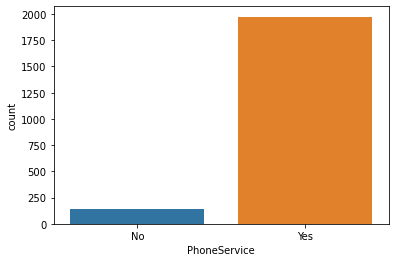

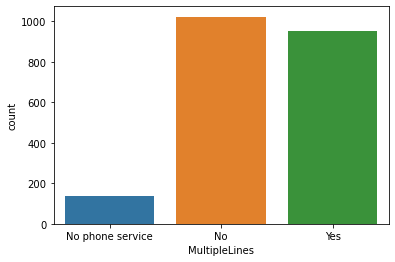

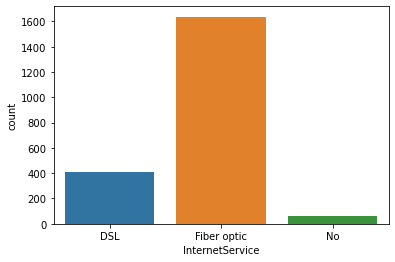

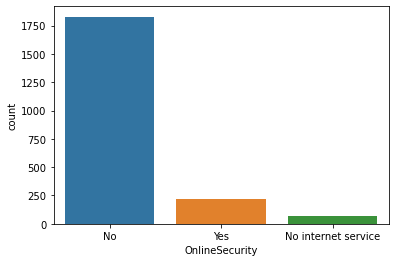

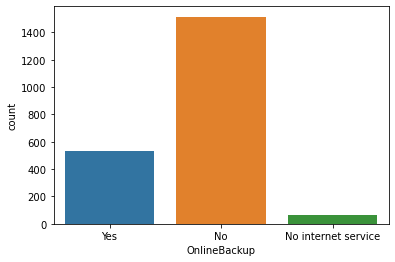

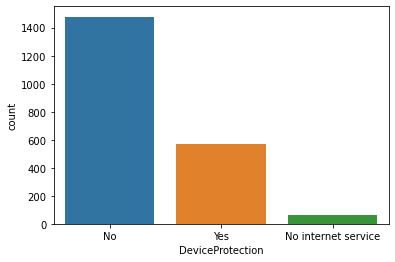

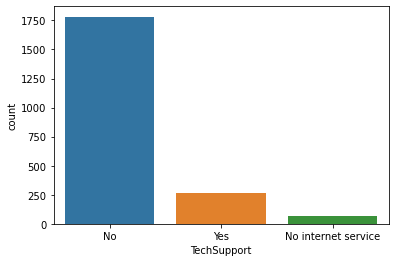

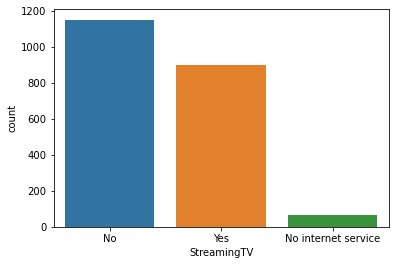

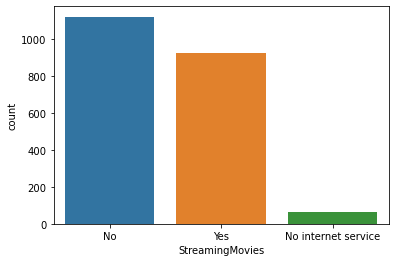

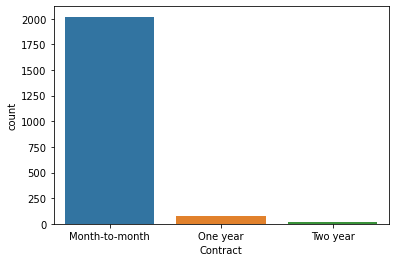

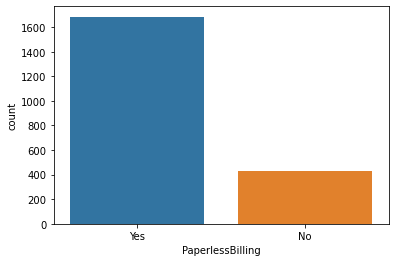

In [194]:

for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [195]:
# From the above plot we could figure out the services mostly the proabable churn customers use and can be used
# to make strategies on that

# for eg:  1)they mostly use fibre optic services, we could check if there are issues there
#     2) most of them don't have online security, so we may improve on that
#     3) mmost of them don't have online backup, no device protection etc
#     4) People with high churn have usually give month to month subscription, and very low churn for one year contract
#     hence we should try to get people to take one year contracts or more by giving doscounts

# Strategies could created based on these results

### Prioritization amongst the top 30% of the customers

In [ ]:
# So since we have created strategies for the first 30% customers, we can further create a list to prioritize 
# for the marketing team to target the potential churn customers

In [201]:
pd.crosstab(index=df_top3['MonthlyChargeSegement'],
           columns=df_top3['Tenure_Segment'],
           values=df_top3['MonthlyCharges'],
           aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
MonthlyChargeSegement,,
High Charges,99.677500,86.720748
Low Charges,44.390909,47.903046


In [ ]:
# hence we should first prioritize high charges high tensure customers and then high charges and low tensure

In [202]:
#number of customers in each segment
pd.crosstab(index=df_top3['MonthlyChargeSegement'],
           columns=df_top3['Tenure_Segment'],
           values=df_top3['MonthlyCharges'],
           aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
MonthlyChargeSegement,,
High Charges,200,1311
Low Charges,11,591


In [ ]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts